## To do
4) Plot Total counts vs charger_name
5) AVG & MEDIAN KWH/s vs Charger_name 
6) Box Plot or Histogram of the charging total duration & charger wise
7) Total anomalies count vs charging stations
8) Finding average power rate of the charger based on the time
9) Time of day scatter plot in a day
10) Average duration per instance across the stations
14) Frequency of usage of chargers in a month/ weekly/ in a day
15) Trend line graph of units consumed cumulatively
16) Power rating graph date wise peaking line average
17) Time frame graph status showing the charger is charging
20) CLOCK ISSUES/ SYSTEM RESETS frequency
21) high units during day and low units at night pattern
22) long duration interval

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df=pd.read_csv("Charging_events_data - charging_events_meter_reading.csv")

In [9]:
df.head()

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name,Meter Total(KWH),Total_duration(hrs),End Time
9,29.08.2018 08:01,1546,2290.81,744.81,0,charger_3,0.74481,0.000000,1 days 05:00:00.082018080
10,29.08.2018 08:19,2433,2447.41,14.41,0,charger_3,0.01441,0.000000,1 days 05:00:00.082018081
11,29.08.2018 13:25,2441,18233.89,15792.89,0,charger_3,15.79289,0.000000,1 days 05:00:00.082018132
12,31.08.2018 06:45,138,5659.07,5521.07,35155,charger_2,5.52107,9.765278,1 days 16:45:55.082018064
13,31.08.2018 09:37,18220,18281.96,61.96,206,charger_3,0.06196,0.057222,1 days 07:03:26.082018093


In [4]:
df.dtypes

Start Time             object
Meter Start (Wh)        int64
Meter End(Wh)         float64
Meter Total(Wh)       float64
Total Duration (s)      int64
Charger_name           object
dtype: object

In [5]:
df['Meter Total(KWH)']=df["Meter Total(Wh)"]*0.001
df['Charger_name'] = df['Charger_name'].replace('NA', pd.NA)
df = df.dropna(subset=['Charger_name'])

In [6]:
df['Total_duration(hrs)']=df["Total Duration (s)"]/3600

In [10]:
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['Charger_name']= df['Charger_name'].astype(str)

In [11]:
df['End Time'] = df['Start Time'] + pd.to_timedelta(df['Total Duration (s)'], unit='s')

In [12]:
df['Day of the Week'] = df['Start Time'].dt.day_name()

In [13]:
df['Hour of Day'] = df['Start Time'].dt.hour

In [14]:
df2 = df[(df['Meter Total(Wh)'] != 0) & (df['Total Duration (s)'] != 0)].copy()

In [15]:
df2.loc[:, 'Power Rate (KW)'] = df2['Meter Total(KWH)'] / df2['Total_duration(hrs)']

In [16]:
df['Charger_ID'] = df['Charger_name'].apply(lambda x: int(re.search(r'\d+', x).group(0)))

In [17]:
df2.dtypes

Start Time             datetime64[ns]
Meter Start (Wh)                int64
Meter End(Wh)                 float64
Meter Total(Wh)               float64
Total Duration (s)              int64
Charger_name                   object
Meter Total(KWH)              float64
Total_duration(hrs)           float64
End Time               datetime64[ns]
Day of the Week                object
Hour of Day                     int64
Power Rate (KW)               float64
dtype: object

In [13]:
#df.sort_values(by='Start Time', inplace=True)

In [14]:
#Total units vs Charger_id

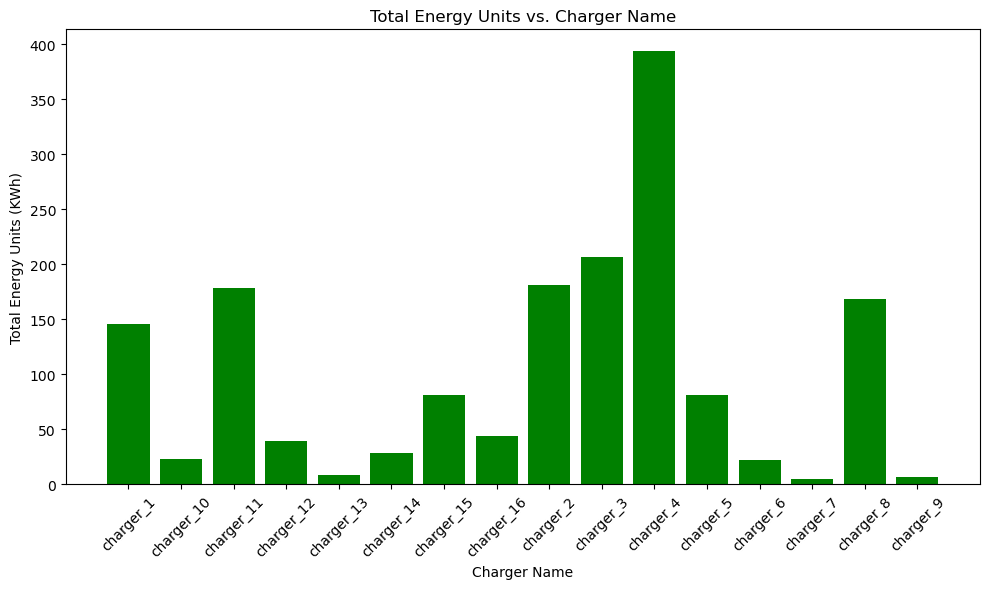

In [18]:
charger_energy_totals = df2.groupby('Charger_name')['Meter Total(KWH)'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(charger_energy_totals['Charger_name'], charger_energy_totals['Meter Total(KWH)'],color='green')
plt.xlabel('Charger Name')
plt.ylabel('Total Energy Units (KWh)')
plt.title('Total Energy Units vs. Charger Name')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [101]:
df2.head()

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name,Meter Total(KWH),Total_duration(hrs),End Time,Day of the Week,Hour of Day,Power Rate (KW)
12,2018-08-31 06:45:00,138,5659.07,5521.07,35155,charger_2,5.52107,9.765278,2018-08-31 16:30:55,Friday,6,0.565378
13,2018-08-31 09:37:00,18220,18281.96,61.96,206,charger_3,0.06196,0.057222,2018-08-31 09:40:26,Friday,9,1.082796
15,2018-03-09 07:25:00,18263,28615.15,10352.15,92823,charger_3,10.35215,25.784167,2018-03-10 09:12:03,Friday,7,0.401493
16,2018-06-09 06:33:00,5660,5729.99,69.99,2939,charger_2,0.06999,0.816389,2018-06-09 07:21:59,Saturday,6,0.085731
21,2018-07-09 11:11:00,11044,11844.25,800.25,2808,charger_2,0.80025,0.780000,2018-07-09 11:57:48,Monday,11,1.025962


In [ ]:
df2['Meter Total(KWH)'].hist()
df2["Meter Total(KWH)"].describe()
df2["Meter Total(KWH)"].plot(kind="box")
plt.show()
#Hour of Day
#Day of the Week

<Axes: title={'center': 'Total Energy Units vs. Charger Name'}, xlabel='Charger Name', ylabel='Total Energy Units (KWh)'>

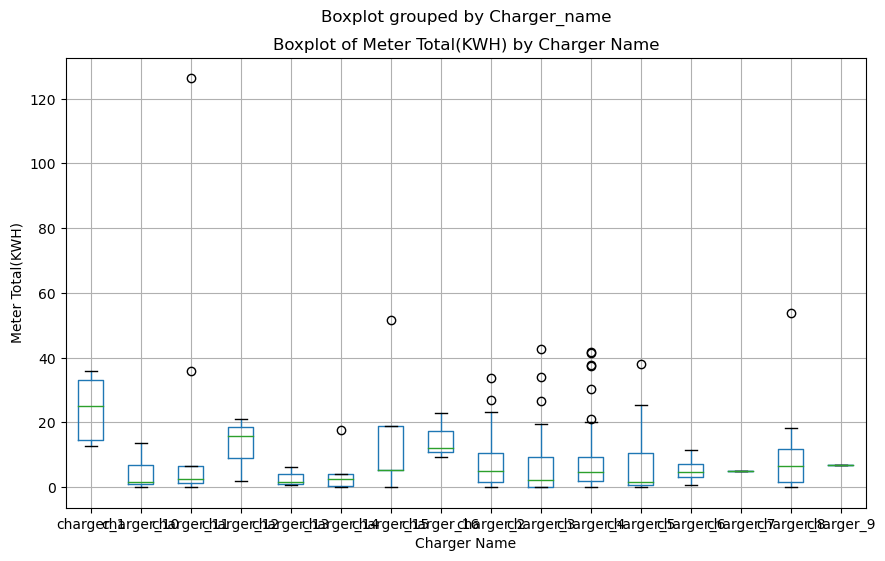

<IPython.core.display.Javascript object>


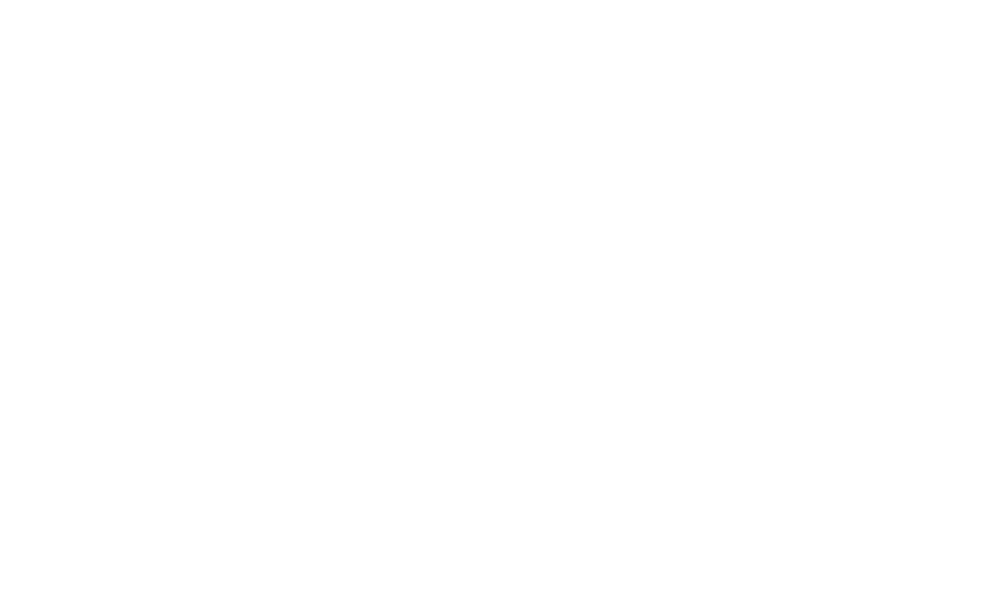

<IPython.core.display.Javascript object>


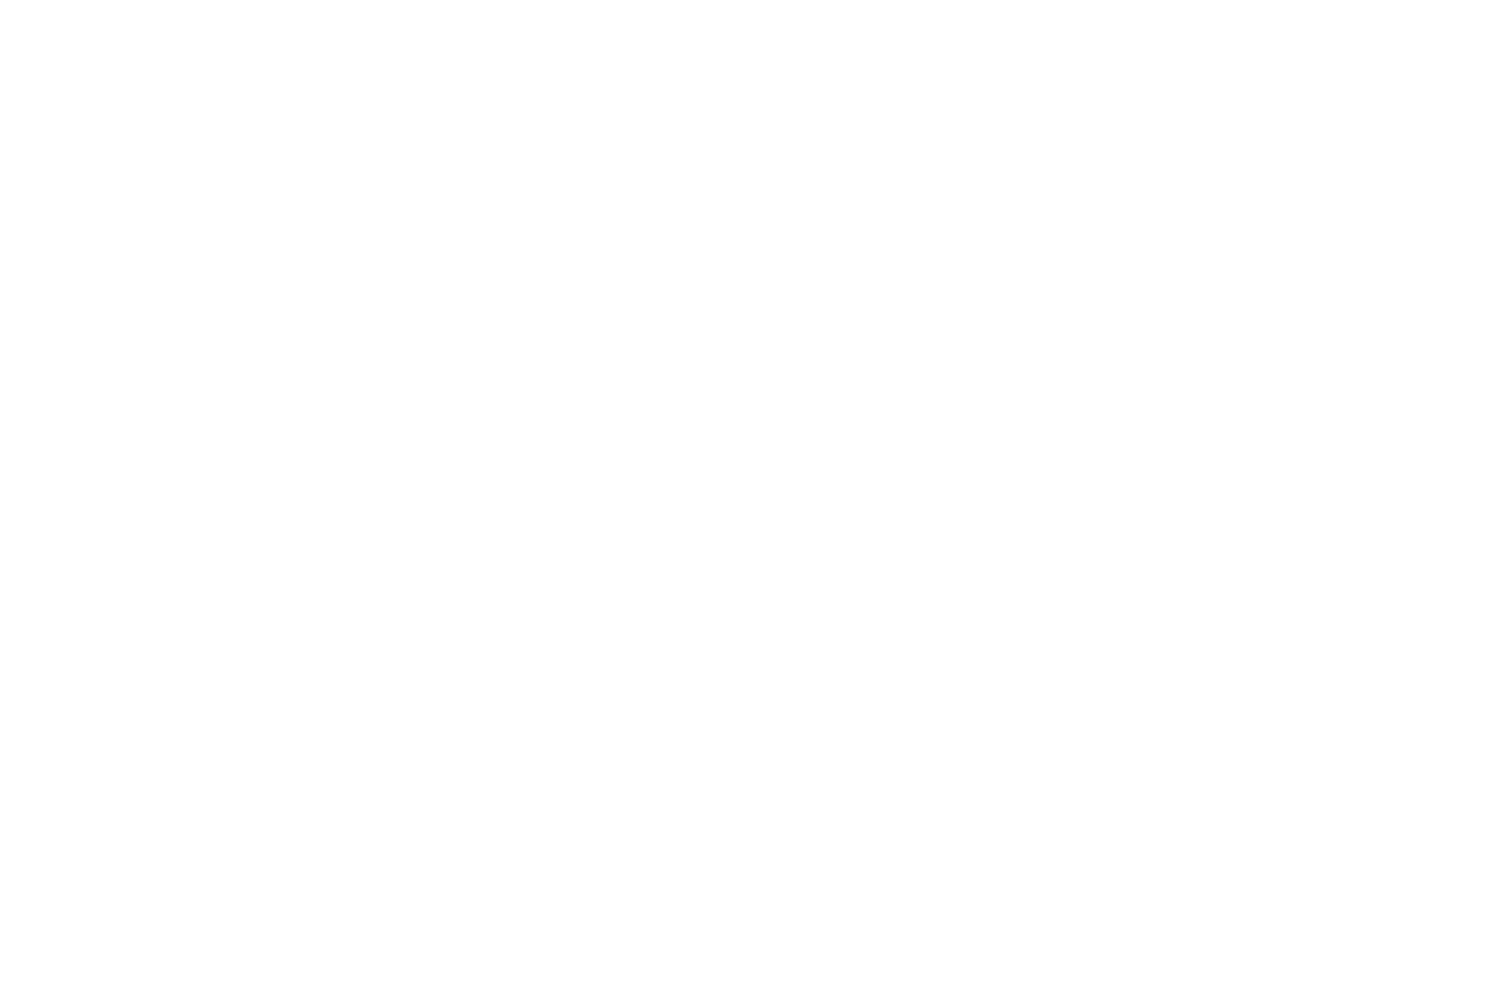

<IPython.core.display.Javascript object>


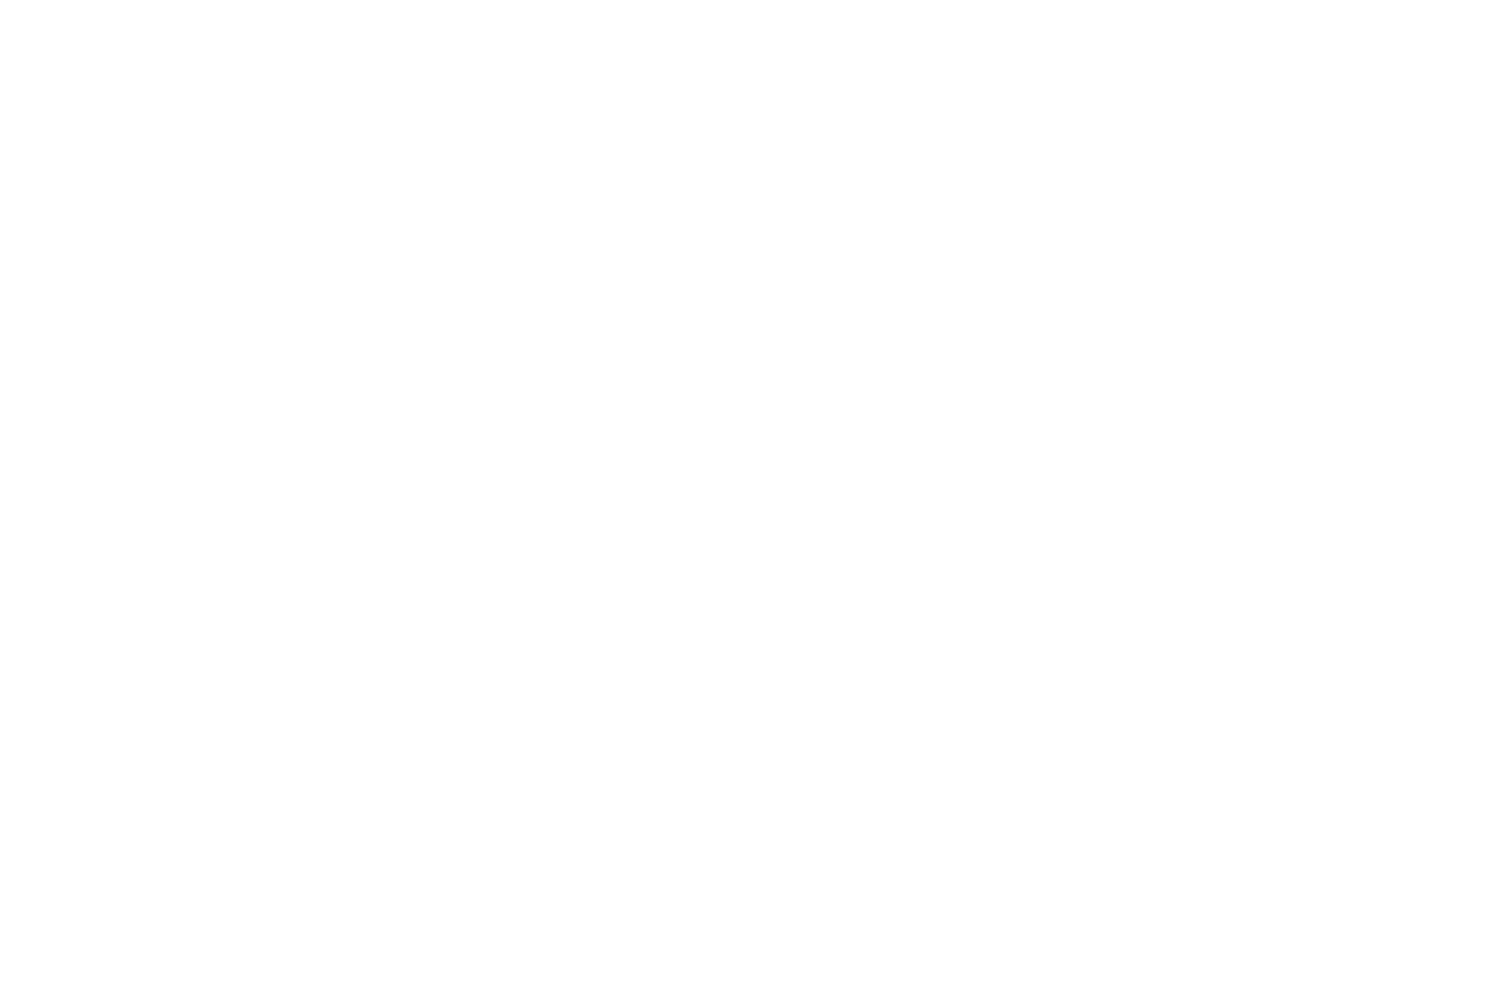

<IPython.core.display.Javascript object>


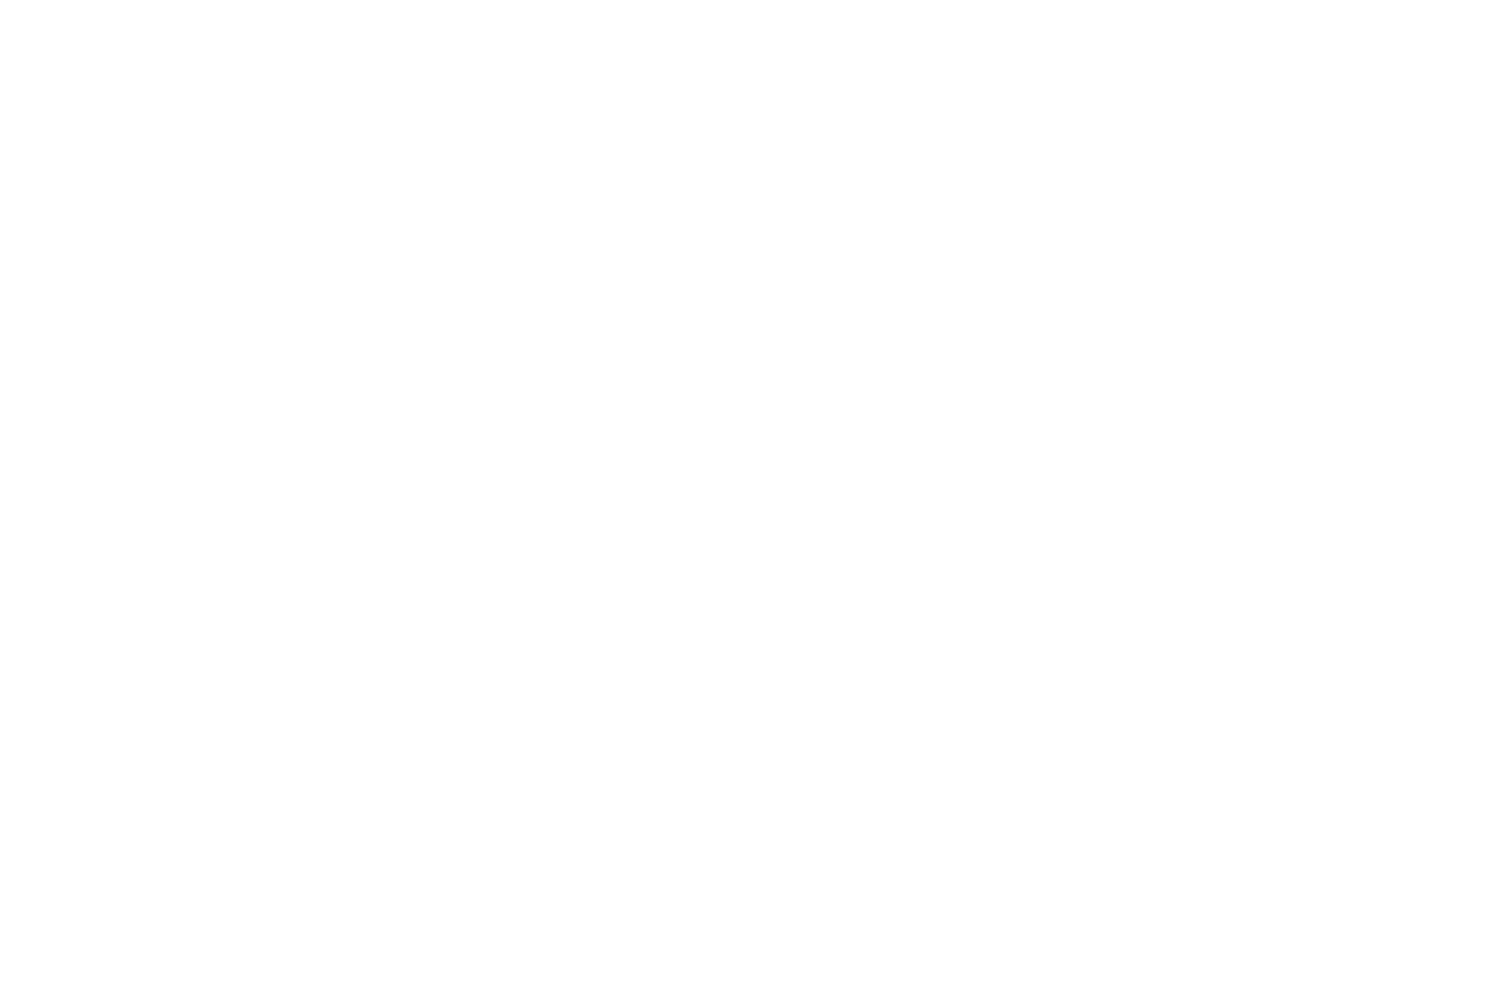

<IPython.core.display.Javascript object>


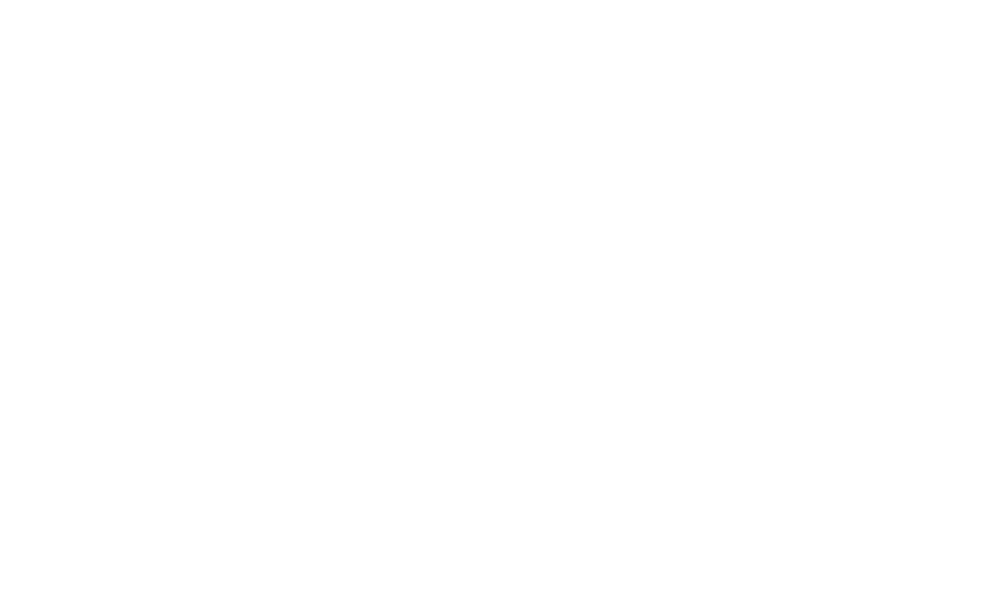

<IPython.core.display.Javascript object>


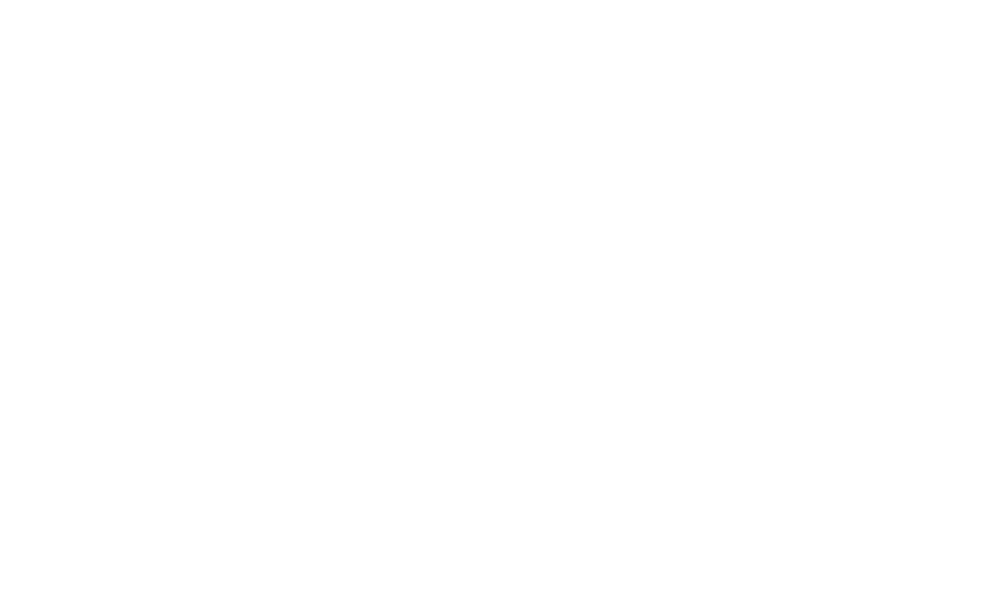

<IPython.core.display.Javascript object>


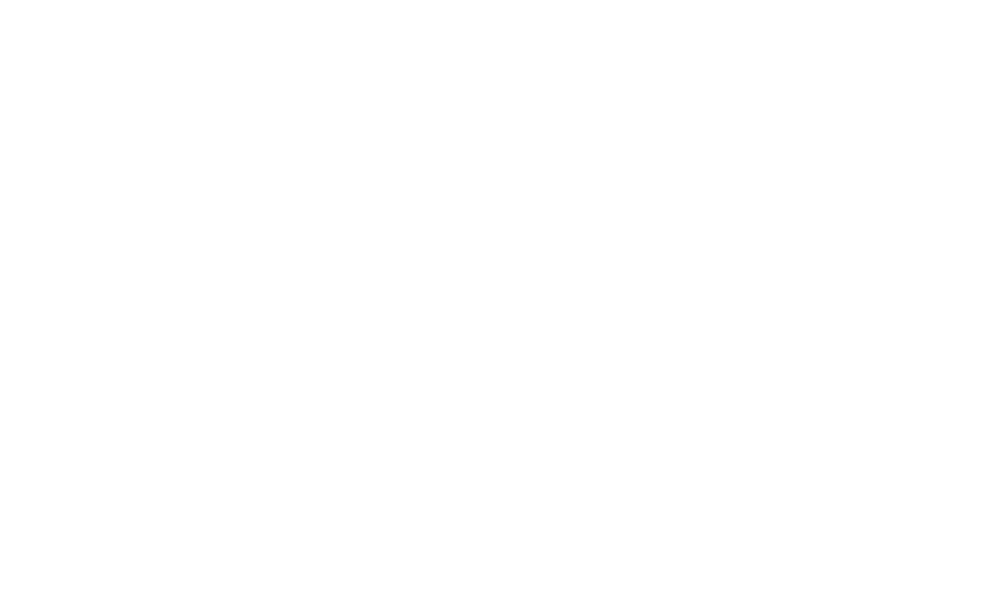

In [103]:
%matplotlib inline
df2['Meter Total(KWH)'].hist()

In [33]:
df2["Meter Total(KWH)"].describe()

count    167.000000
mean       9.662899
std       14.569941
min        0.009770
25%        1.205520
50%        4.698860
75%       12.356640
max      126.350920
Name: Meter Total(KWH), dtype: float64

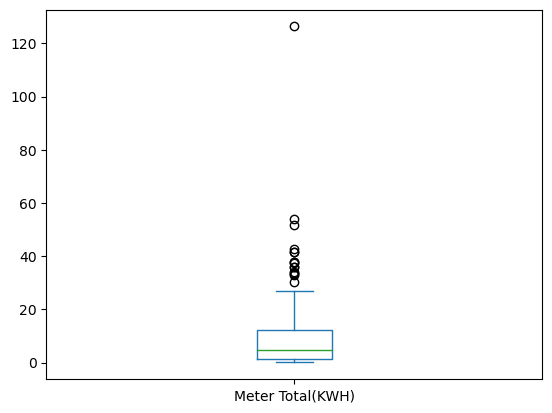

In [104]:
df2["Meter Total(KWH)"].plot(kind="box")
plt.show()

In [18]:
df2[df2['Charger_name'] == 'charger_3'].shape[0]

31

Box Plot for Unit consumed, range across all the chargers

In [105]:
df2.boxplot(column="Meter Total(KWH)", by="Charger_ID", figsize=(10, 6))
plt.title("Meter Total(KWH) by Charger Name")
plt.suptitle("")
plt.xlabel("Charger Name")
plt.ylabel("Meter Total(KWH)")
plt.show()

KeyError: 'Charger_ID'

In [ ]:
## Box plot for the Power rate

<IPython.core.display.Javascript object>


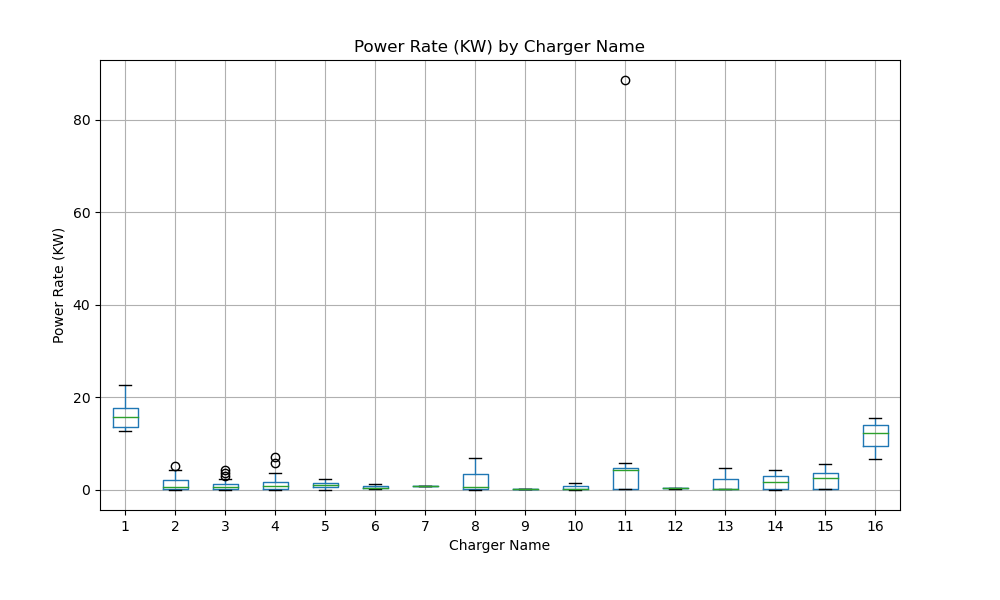

C:\Users\91944\AppData\Local\Temp\ipykernel_35420\83837615.py:7: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [65]:
df2.boxplot(column="Power Rate (KW)", by="Charger_ID", figsize=(10, 6))
plt.title("Power Rate (KW) by Charger Name")
plt.xlabel("Charger Name")
plt.suptitle("")
plt.ylabel("Power Rate (KW)")
#plt.xticks(rotation=90)
plt.show()

In [ ]:
#Box plot based on duration

<IPython.core.display.Javascript object>


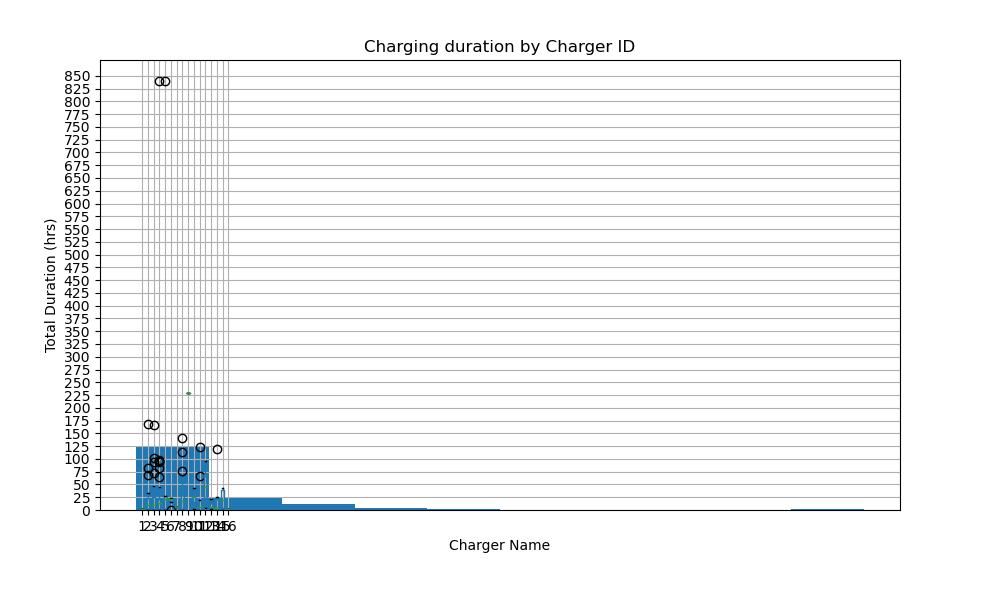

C:\Users\91944\AppData\Local\Temp\ipykernel_35420\3476279581.py:14: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [79]:
# Your existing boxplot code
df2.boxplot(column="Total_duration(hrs)", by="Charger_ID", figsize=(10, 6))
plt.title("Charging duration by Charger ID")
plt.suptitle("")  # Suppress the automatic title to only show your custom title
plt.xlabel("Charger Name")
plt.ylabel("Total Duration (hrs)")

# Customize y-axis ticks
plt.yticks(range(0, int(df2["Total_duration(hrs)"].max()) + 25, 25))

# Optionally, if you want to set a specific range for y-axis you can use plt.ylim
# plt.ylim(0, your_upper_limit)

plt.show()

In [58]:
#Line graph of KWH consumed

<IPython.core.display.Javascript object>


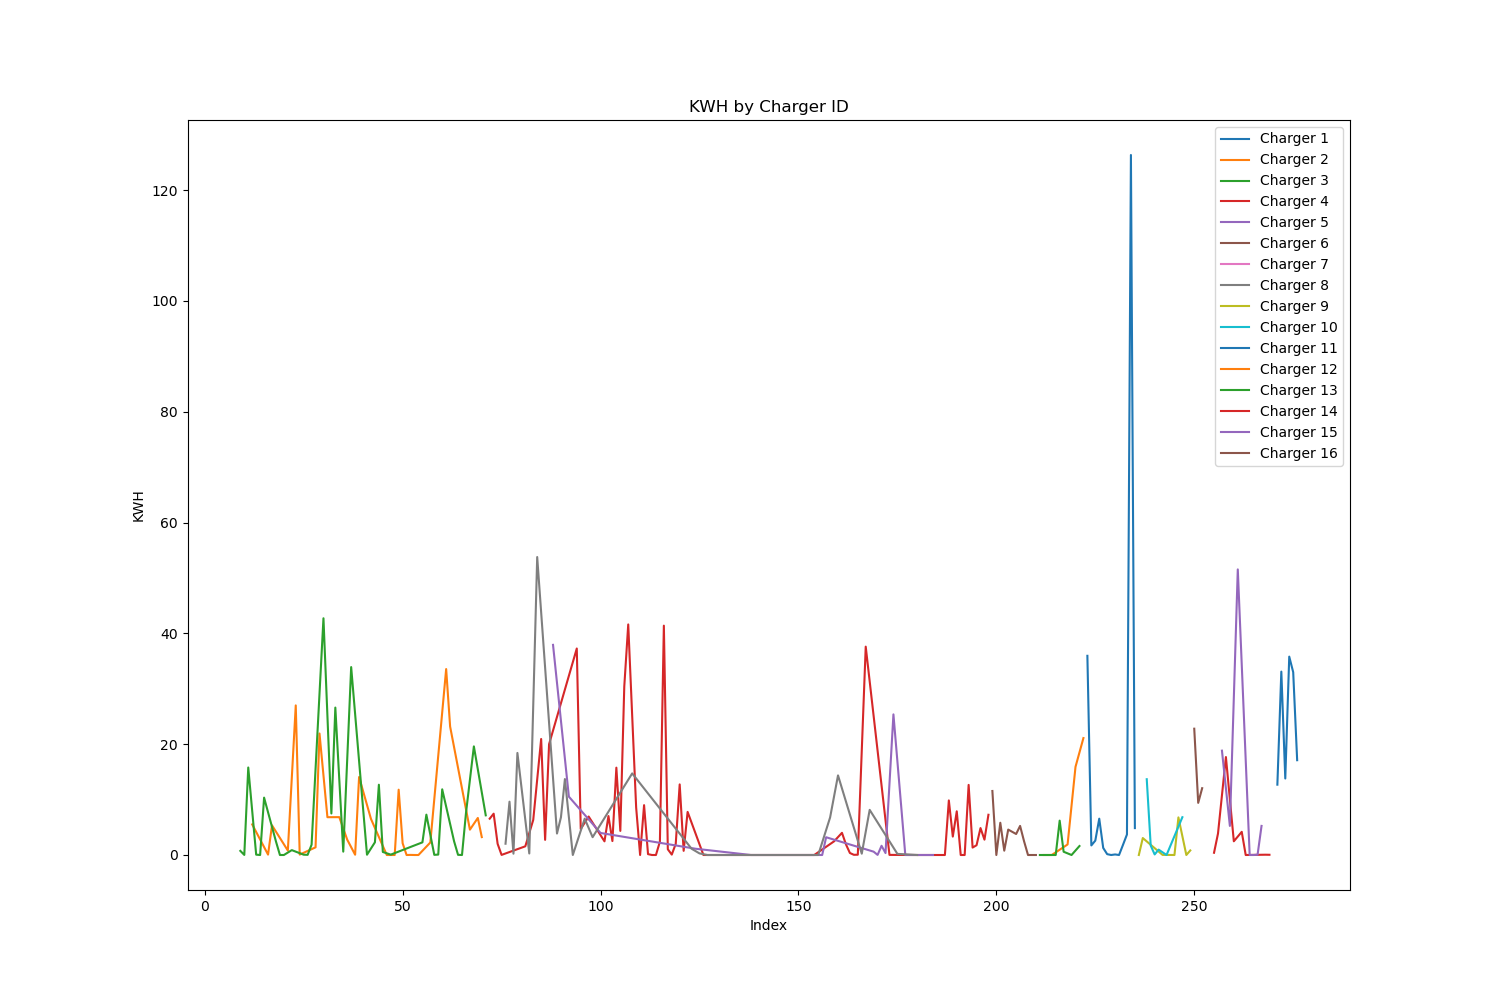

C:\Users\91944\AppData\Local\Temp\ipykernel_35420\1344212409.py:20: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [59]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data
# Group the data by 'Charger_ID' and then plot each group
groups = df.groupby('Charger_ID')

# Set up the plot
plt.figure(figsize=(15, 10))

# Loop through each group and plot it on the same axis
for name, group in groups:
    plt.plot(group.index, group['Meter Total(KWH)'], label=f'Charger {name}')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('KWH')
plt.title('KWH by Charger ID')
plt.legend()  # This adds a legend with the label names

plt.show()

In [30]:
#df2.to_csv("charging.csv")

In [ ]:
# Box plot based on hour of the day

In [84]:
df2['Meter Total(KWH)'].hist()

<Axes: title={'center': 'Charging duration by Charger ID'}, xlabel='Charger Name', ylabel='Total Duration (hrs)'>